### Time varying GSTC - cond - 1D

In [1]:
from sympy import *
from Electromagnetics.VectorCalculus import *
from IPython.display import display, Math, Latex

from sympy.utilities.lambdify import lambdastr
from Electromagnetics import Misc

t, x, y, z = symbols('t x y z')
Ei_x = Function('E^i_{x}')(t)
Er_x = Function('E^r_{x}')(t)
Et_x = Function('E^t_{x}')(t)

sig_ee = Function('\\sigma_{ee}')(t)
sig_mm = Function('\\sigma_{mm}')(t)


eps_0, mu_0, eta_0 = symbols('\\epsilon_0 \\mu_0 \\eta_0')

Ei = Matrix([[Ei_x, 0, 0]])
Er = Matrix([[Er_x, 0, 0]])
Et = Matrix([[Et_x, 0, 0]])

a_z = Matrix([[0, 0, 1]])

Hi = crossproduct(a_z, Ei)/eta_0
Hr = crossproduct(-a_z, Er)/eta_0
Ht = crossproduct(a_z, Et)/eta_0

display(Math('E^i = ' + latex(Ei)))
display(Math('E^r = ' + latex(Er)))
display(Math('E^t = ' + latex(Et)))

display(Math('H^i = ' + latex(Hi)))
display(Math('H^r = ' + latex(Hr)))
display(Math('H^t = ' + latex(Ht)))

del_E = Et-Ei-Er
del_H = Ht-Hi-Hr
E_avg = (Ei+Er+Et)/2.0
H_avg = (Hi+Hr+Ht)/2.0

Je = sig_ee*E_avg
Jm = sig_mm*H_avg

display(Math('J_e = ' + latex(Je.T)))
display(Math('J_m = ' + latex(Jm.T)))

Je_sub = crossproduct(a_z, del_H)
Jm_sub = -crossproduct(a_z, del_E)
display(Math('J_e = ' + latex(Je_sub.T)))
display(Math('J_m = ' + latex(Jm_sub.T)))


eq_0 = Je[0] - Je_sub[0]
eq_1 = Jm[1] - Jm_sub[1]

display(Math('Eq_0 = ' + latex(eq_0)))
display(Math('Eq_1 = ' + latex(eq_1)))

Er_Et_sub = solve([eq_0, eq_1], [Er_x, Et_x])
Er_x_sub = Er_Et_sub[Er_x]
Et_x_sub = Er_Et_sub[Et_x]

display(Math('Er_x = ' + latex(Er_x_sub)))
display(Math('Et_x = ' + latex(Et_x_sub)))


from sympy.utilities.lambdify import lambdastr
from Electromagnetics import Misc

Er_x_str = lambdastr((), Er_x_sub).replace('\\', '').replace('{', '').replace('}', '')
Er_x_str = Misc.replace_whole_word(Er_x_str, 'E^i_x', 'E_i') 
Er_x_str = Misc.replace_whole_word(Er_x_str, 'sigma_ee', 'sig_ee') 
Er_x_str = Misc.replace_whole_word(Er_x_str, 'sigma_mm', 'sig_mm') 
print('Er_x_str = \n', Er_x_str)

Et_x_str = lambdastr((), Et_x_sub).replace('\\', '').replace('{', '').replace('}', '')
Et_x_str = Misc.replace_whole_word(Et_x_str, 'E^i_x', 'E_i') 
Et_x_str = Misc.replace_whole_word(Et_x_str, 'sigma_ee', 'sig_ee') 
Et_x_str = Misc.replace_whole_word(Et_x_str, 'sigma_mm', 'sig_mm') 
print('Et_x_str = \n', Et_x_str)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Er_x_str = 
 lambda : (-2.0*(eta_0**2*sig_ee(t) - sig_mm(t))*E_i(t)/(2.0*eta_0**2*sig_ee(t) + eta_0*sig_ee(t)*sig_mm(t) + 4.0*eta_0 + 2.0*sig_mm(t)))
Et_x_str = 
 lambda : (-eta_0*(sig_ee(t)*sig_mm(t) - 4.0)*E_i(t)/(2.0*eta_0**2*sig_ee(t) + eta_0*sig_ee(t)*sig_mm(t) + 4.0*eta_0 + 2.0*sig_mm(t)))


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

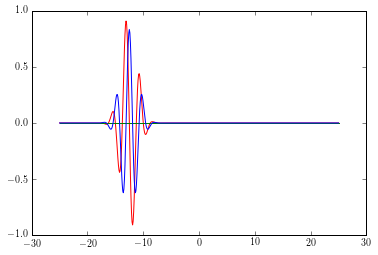

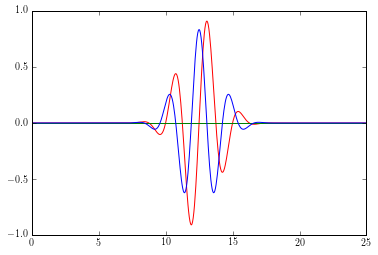

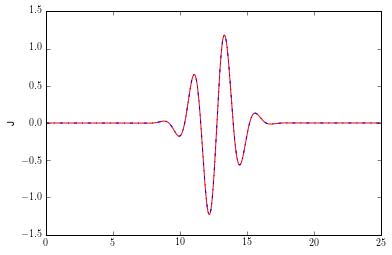

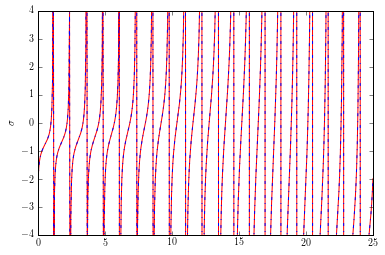

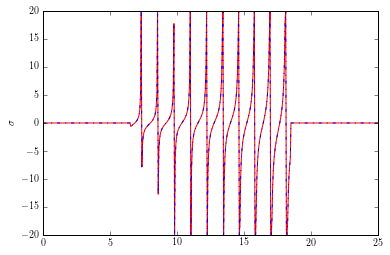

self.Sig_ee_intervals: [[6.494140625, 6.54296875], [6.8359375, 6.884765625], [8.0078125, 8.056640625], [9.1796875, 9.228515625], [10.3515625, 10.400390625], [11.5234375, 11.572265625], [12.744140625, 12.79296875], [13.96484375, 14.013671875], [15.185546875, 15.234375], [16.40625, 16.455078125], [17.626953125, 17.67578125]]
self.Sig_mm_intervals: [[6.494140625, 6.54296875], [6.8359375, 6.884765625], [8.0078125, 8.056640625], [9.1796875, 9.228515625], [10.3515625, 10.400390625], [11.5234375, 11.572265625], [12.744140625, 12.79296875], [13.96484375, 14.013671875], [15.185546875, 15.234375], [16.40625, 16.455078125], [17.626953125, 17.67578125]]


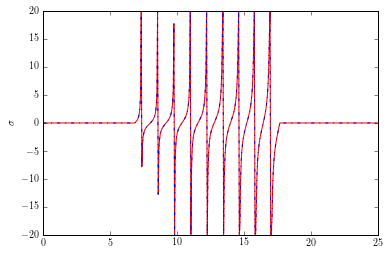

/home/nima/ipython workspace/Electromagnetics/GSTCTD.py:711: RuntimeWarning: invalid value encountered in true_divide
  eta_0*sig_ee*sig_mm + 4.0*eta_0 + 2.0*sig_mm))
/home/nima/ipython workspace/Electromagnetics/GSTCTD.py:714: RuntimeWarning: divide by zero encountered in true_divide
  eta_0*sig_ee*sig_mm + 4.0*eta_0 + 2.0*sig_mm))


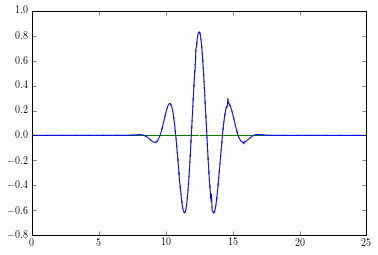

In [2]:
%pylab inline

import numpy as np
from scipy.integrate import romb, quad
import matplotlib.pyplot as plt

from Electromagnetics.GSTCTD import GSTCTD1Dcond
import sympy
from IPython.display import display, Math, Latex
from sympy import latex

plt.rc('text', usetex=True)

import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'gstc')
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)


ms = GSTCTD1Dcond()

freq = 0.4*ms.c
omega = 2.0*np.pi*freq
eps_0 = ms.eps_0
mu_0 = ms.mu_0
eta_0 = ms.eta_0
c = ms.c
lamda = c/freq
k = omega/c

d = 10.0*lamda
z_0 = -d/2.0

n_pts = 2**9+1

A = 1.0
sigma = 0.5
wnd = [-z_0/c-3.0/sigma, -z_0/c+3.0/sigma]
t, z = sympy.symbols('t, z')
E_i = A*sympy.exp(-(t-(z-z_0)/c)**2*sigma**2)*sympy.sin(k*(t-(z-z_0)/c))
E_r = 0
E_t = sympy.Derivative(E_i, t).doit()/3.0

display(Math('E_i : ' + latex(E_i)))
#print(latex(E_i))
display(Math('E_r : ' + latex(E_r)))
#print(latex(E_r))
display(Math('E_t : ' + latex(E_t)))
#print(latex(E_t))

ms.SetFieldsSympy(t, z, E_i, E_r, E_t)

t = np.linspace(0.0, d/c, n_pts)
z = np.linspace(-d, d, n_pts)

E_i_t0 = ms.E_i(0.0, z) 
E_r_t0 = ms.E_r(0.0, z)*np.ones(len(z))
E_t_t0 = ms.E_t(0.0, z)*np.ones(len(z))

plt.plot(z, E_i_t0, 'r')
plt.plot(z, E_r_t0, 'g')
plt.plot(z, E_t_t0, 'b')

file_name = os.path.join(dir_name, 'fields_z'+file_ext)
plt.savefig(file_name)
plt.show()


E_i_z0 = ms.E_i(t, 0.0)  
E_r_z0 = ms.E_r(t, 0.0)*np.ones(len(t))
E_t_z0 = ms.E_t(t, 0.0)*np.ones(len(t))

plt.plot(t, E_i_z0, 'r')
plt.plot(t, E_r_z0, 'g')
plt.plot(t, E_t_z0, 'b')
file_name = os.path.join(dir_name, 'fields_t'+file_ext)
plt.savefig(file_name)
plt.show()


ms.GetJemSigeeSigmm(t)

plt.plot(t, ms.Je_t, 'r')
plt.plot(t, ms.Jm_t, 'b-.')
plt.ylabel('J')
file_name = os.path.join(dir_name, 'J_em'+file_ext)
plt.savefig(file_name)
plt.show()

plt.plot(t, ms.Sig_ee, 'r')
plt.plot(t, ms.Sig_mm, 'b-.')
plt.ylabel(r'\sigma')
plt.gca().set_ylim([-4.0, 4.0])
file_name = os.path.join(dir_name, 'Sig_ee_mm'+file_ext)
plt.savefig(file_name)
plt.show()

ms.ClipConductivities(Sig_ee_max=20.0, Sig_mm_max=20.0)
ms.TimeWindowConductivities(wnd, wnd)


plt.plot(t, ms.Sig_ee, 'r')
plt.plot(t, ms.Sig_mm, 'b-.')
plt.ylabel(r'\sigma')
#plt.gca().set_ylim([-5.0, 5.0])
plt.show()

ms.FindCondZeros()
ms.AdjustWindowToZeros()

plt.plot(t, ms.Sig_ee, 'r')
plt.plot(t, ms.Sig_mm, 'b-.')
plt.ylabel(r'\sigma')
#plt.gca().set_ylim([-5.0, 5.0])
plt.show()


E_r_z0_, E_t_z0_ = ms.SolveErEt()

plt.plot(t, E_r_z0_, 'g', t, E_r_z0, 'g-.')
plt.plot(t, E_t_z0_, 'b', t, E_t_z0, 'b-.')
#plt.gca().set_ylim([-1.5, 1.5])
file_name = os.path.join(dir_name, 'fields_t'+file_ext)
plt.savefig(file_name)
plt.show()
